In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Exploration des données de la SNCF

La SNCF met en libre accès une base de données couvrant de nombreux sujets distincts. Des retards aux objets trouvés en passant par des statistiques sur les employés, on trouve toutes sortes d'informations. Etudions plus en profondeur certaines données.

## I. Retards

Tout d'abord, commençons par les retards, qui viennent rapidement à l'esprit quand on pense à la SNCF.
Dispose-t-on de données qui pourraient les expliquer ? Quelles en sont les conséquences ?

### a. Corrélation entre accidents et retards

In [2]:
accident = pd.read_csv('data/incidents-de-securite-epsf.csv', sep = ';')
retard = pd.read_csv('data/reglarite-mensuelle-tgv-nationale.csv', sep = ';')

J'aimerais réunir les éléments par date afin d'avoir des stats pour chaque mois de 2023/2024.
Je me suis renseigné sur internet et j'ai trouvé la methode datetime qui admet des fonctionnalités utiles,
notemment extraire facilement le mois ainsi que l'année.
On rajoute ainsi dans accident la colonne mois et année

In [3]:
accident['Date'] = pd.to_datetime(accident['Date'])
accident.dtypes
accident['mois'] = pd.DatetimeIndex(accident['Date']).month
accident['année'] = pd.DatetimeIndex(accident['Date']).year


La dataframe retard contenant déjà les informations par mois, je me contente d'isoler les années et l'année 2023

In [4]:
retard['Date'] = pd.to_datetime(retard['Date'])
retard['année'] = pd.DatetimeIndex(retard['Date']).year
retard = retard[ retard['année'] == 2023]


J'isole aussi le mois afin de pouvoir comparer facilement avec la table accident

In [5]:
retard['mois'] = pd.DatetimeIndex(retard['Date']).month
retard

,Date,Régularité composite,Ponctualité origine,année,mois
96,2023-01-01,89.065483,82.388152,2023,1
97,2023-02-01,90.838404,83.006536,2023,2
98,2023-03-01,88.693164,82.092210,2023,3
99,2023-04-01,88.303113,81.286029,2023,4
100,2023-05-01,89.311594,81.597222,2023,5
101,2023-06-01,85.058853,78.502379,2023,6
102,2023-07-01,85.995537,78.254401,2023,7
103,2023-08-01,86.988811,79.864343,2023,8
104,2023-09-01,87.036582,80.486128,2023,9
105,2023-10-01,86.980411,80.946011,2023,10


In [6]:
accident

,Origine,Date,Nature,Région,Lieu,Gravité EPSF,mois,année
0,Accident de personne,2023-01-03,Accident de personne sur une traversée pour le...,Bourgogne-Franche-Comté,Meursault (21),5.0,1,2023
1,Heurt installation par tiers,2023-01-10,Incident caténaire à la suite de la collision ...,Grand Est,Revigny (55),4.0,1,2023
2,Collision hors passage à niveau,2023-01-29,nombreux dgats à la caténaire et au pantograph...,NaN,Entre salbris et la motte beuvron (41),5.0,1,2023
3,Collision passage à niveau,2023-02-02,Collision à un passage à niveau,Auvergne-Rhône-Alpes,Diou (36),5.0,2,2023
4,Réseau,2023-02-03,Lors du refoulement d’une rame voyageur vers l...,Bretagne,Lorient (56),4.0,2,2023
...,...,...,...,...,...,...,...,...
232,Accident de personne,2023-08-06,heurt par un train de voyageurs d'un passager ...,Auvergne-Rhône-Alpes,Entre venissieux et saint priest (69),5.0,8,2023
233,Réseau,2023-08-09,Heurt entre un train de travaux et un train de...,Île-de-France,Etampes (91),4.0,8,2023
234,Réseau,2023-08-28,défaut de mesure de protections et passage d'u...,Hauts-de-France,Compiegne(60),4.0,8,2023
235,Réseau,2023-08-29,Franchissement du signal C72 fermé par manœuvr...,Grand Est,Raon-L’étape (Dépt : 88),4.0,8,2023


Je cherche maintenant à sommer les gravités par mois, dans l'idée où plus l'accident est grave,
plus le retard engendré est susceptible d'avoir de l'importance
Je crée donc une table par mois ou j'ai un nombre correspondant à la somme des gravités des accidents de ce mois

In [7]:
accident.columns
data_utile = accident.loc[:, ['mois', 'Gravité EPSF']]
regroupé = data_utile.groupby(by = 'mois', axis = 0)
gravité_mois = regroupé.sum()
gravité_mois


C:\Users\Lucile\AppData\Local\Temp\ipykernel_21112\1243987391.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  regroupé = data_utile.groupby(by = 'mois', axis = 0)


,Gravité EPSF
mois,
1,103.0
2,147.0
3,112.0
4,77.0
5,141.0
6,146.0
7,194.0
8,126.0


In [8]:
retard_mois = retard.loc[:, ['Régularité composite', 'mois']]
retard_mois = retard_mois.set_index('mois')
retard_mois = retard_mois.loc[1:8, :]
retard_mois

,Régularité composite
mois,
1,89.065483
2,90.838404
3,88.693164
4,88.303113
5,89.311594
6,85.058853
7,85.995537
8,86.988811


In [9]:
Corrélation = retard_mois.join(gravité_mois)
Corrélation = Corrélation.set_index('Gravité EPSF')
Corrélation

,Régularité composite
Gravité EPSF,
103.0,89.065483
147.0,90.838404
112.0,88.693164
77.0,88.303113
141.0,89.311594
146.0,85.058853
194.0,85.995537
126.0,86.988811


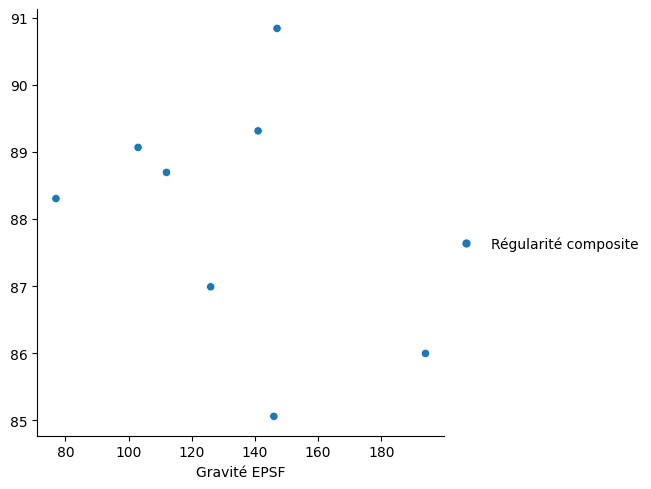

In [10]:
sns.relplot(Corrélation);

Ainsi, la corrélation ne semble pas évidente. A priori, c'est peut-être pas assez représentatif car on a eu les données sur 8 points, et qu'on a sommé par mois. Cependant, on voit tout de même que il n'y a pas de corrélation directe. Ainsi, le retard des trains n'est pas relié directement aux accidents. En réalité, un train qui a un accident arrive de temps en temps en retard mais la cause principale n'est pas due aux accidents. 

De plus, on peut regarder quels types d'incidents sont représentés dans la dataframe accident

In [11]:
accident = pd.read_csv('data/incidents-de-securite-epsf.csv', sep = ';')
accident['Nature'].value_counts()

Nature
Heurt d'un arbre par un train de voyageurs                                                                                                                                            2
Erreur de procédure pour l'exécution d'une manoeuvre à contre-voie.                                                                                                                   2
heurt d'une personne par un train de voyageurs                                                                                                                                        2
accident de personne                                                                                                                                                                  2
Incident caténaire à la suite de la collision d’une pelle mécanique contre la partie neutre d’un transversal de portique souple.                                                      1
                                                                         

On voit ainsi qu'il y a 233 types d'incidents différents, tous de manière assez disparate, allant de la percution mortelle d'un motard jusqu'à : 'Franchissement du signal C72 fermé par manœuvre de refoulement d’un convoi du GI (Le chef de manœuvre de l’Infralog a omis de demander à l’AC la commande à l’ouverture du signal)'
On répertorie donc ainsi tous les types d'incidents, mais on ne connait pas la cause de ceux-ci.

### b .Impact des retards sur la fréquentation des lignes de transilien

## II. L’égalité homme/femme au sein de la SNCF

Intéressons nous maintenant à la place des femmes dans l'effectif de la SNCF.
Sont-elles bien représentées ? Existe t-il des postes discriminants pour les femmes ?

Voici le tableau que nous allons utiliser pour cette étude :

In [10]:

T=pd.read_csv('data/repartition-genre-effectif.csv', sep=";") #Je rends le tableau lisible 
print(T)

    Date                 Contrat de travail  Nombre d'hommes  Nombre de femmes
0   2010  Agents contractuels temps complet           3420.0            2341.0
1   2010  Agents contractuels temps partiel            577.0            1478.0
2   2010                  Cadres supérieurs           1187.0             279.0
3   2013                   Agents au statut         115402.0           26199.0
4   2013  Agents contractuels temps complet           7053.0            3487.0
5   2013  Agents contractuels temps partiel            525.0            1362.0
6   2014                  Cadres supérieurs           1171.0             330.0
7   2015                   Agents au statut         110377.0           25620.0
8   2016  Agents contractuels temps complet           9440.0            3703.0
9   2016  Agents contractuels temps partiel            447.0            1107.0
10  2017                   Agents au statut         104556.0           24972.0
11  2018                   Agents au statut         

Le tableau explicite par année et par type de poste l'effectif masculin et féminin.
Cependant pour les années 2020 et 2021 il manque certains postes, nous allons donc, par soucis de cohérence "écarter" ces années pour réaliser notre étude.

In [11]:
Tn=T.loc[(T['Date']!=2020)&(T['Date']!=2021)] #création d'un nouveau tableau sans ces années

### a) Evolution du pourcentage de nombre de femmes 

Dans un premier temps, nous allons réaliser une étude générale dans laquelle nous allons représenter la proportion de femme au sein de l'entreprise en fonction de l'année. 

On crée un groupby par date et on réalise un simple calcul de proportion.

In [12]:

bydate=Tn.groupby(by='Date')
proportion_femmes_date=bydate["Nombre de femmes"].sum()/(bydate["Nombre de femmes"].sum() + bydate["Nombre d'hommes"].sum())*100

On trace alors l'évolution du pourcentage du nombre de femmes 

Text(0, 0.5, 'Proportion')

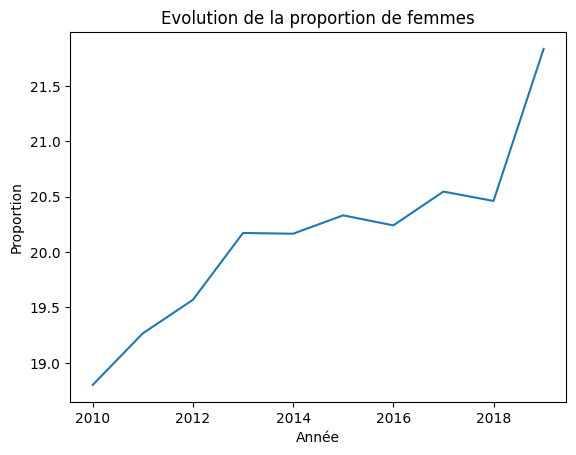

In [13]:
plt.plot(proportion_femmes_date.index, proportion_femmes_date)
plt.title("Evolution de la proportion de femmes")
plt.xlabel("Année")
plt.ylabel("Proportion")

La proportion de femmes au sein de la sncf augmente chaque année : c'est cool

### b) Place des femmes par poste 

Affinons notre étude en nous intéressant aux disparités poste par poste : la proportion de femmes est-elle la plus faible au sein des postes les mieux payés ? 

Dans un premier temps nous allons faire une moyenne de la proportionde femmes par poste sur les 10 dernières années pour avoir une vision globale.

On crée un groupby mais cette fois ci par poste et on calcule également un pourcentage. 

In [14]:
byposte=Tn.groupby(by="Contrat de travail")
proportion_femmes_poste=byposte["Nombre de femmes"].sum()/(byposte["Nombre de femmes"].sum()+byposte["Nombre d'hommes"].sum())*100


On trace un histogramme, dans lequel on trace par poste la proportion de femme.

Text(0, 0.5, 'Pourcentage de femmes')

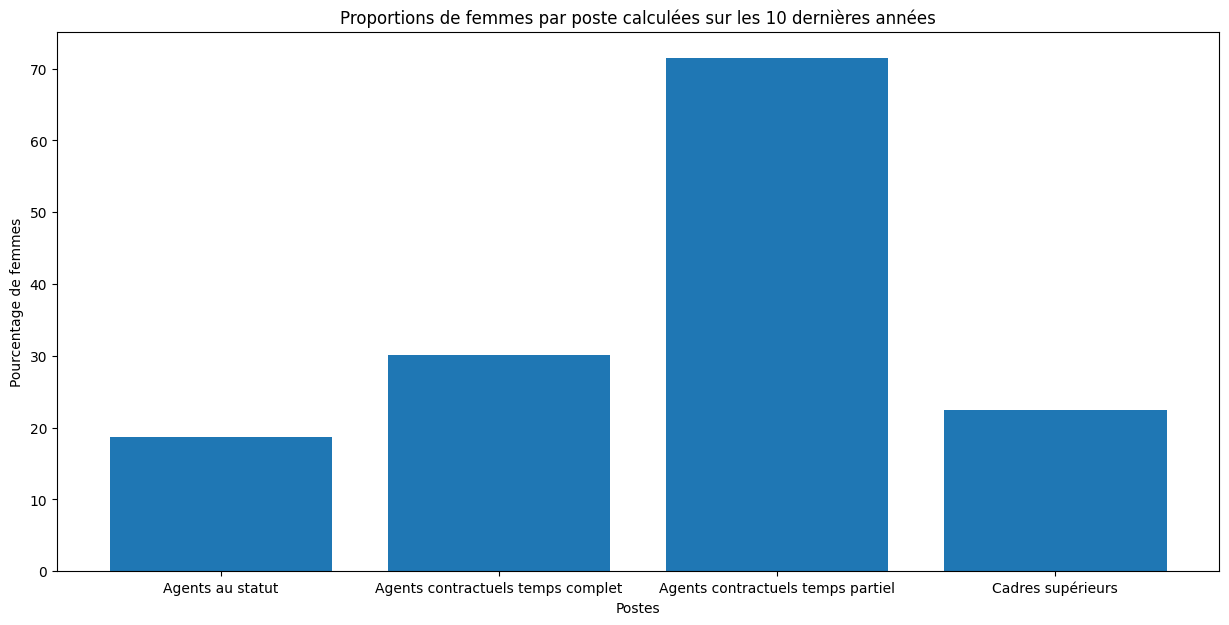

In [15]:
plt.figure(figsize=(15,7))
plt.bar(proportion_femmes_poste.index,proportion_femmes_poste)
plt.title("Proportions de femmes par poste calculées sur les 10 dernières années")
plt.xlabel("Postes")
plt.ylabel("Pourcentage de femmes")


Comme on peut le voir, en moyenne sur ces 10 dernières années, les femmes sont sous représentées dans les métiers les mieux payés (cadre supérieur et agent au statut) et surreprésentées dans les métiers les moins bien payés (agent contractuel temps partiel). 

Cependant il ne faut pas totalement être pessimiste. Essayons de représenter l'évolution de la parité homme/femme dans les postes de cadre supérieur et d'agent à temps partiel (les postes repesctivement les mieux payés et moins bien payés).

On réalise donc un groupby à multiIndex :

Text(0.5, 1.0, 'Evolution du pourcentage de femme dans différents postes')

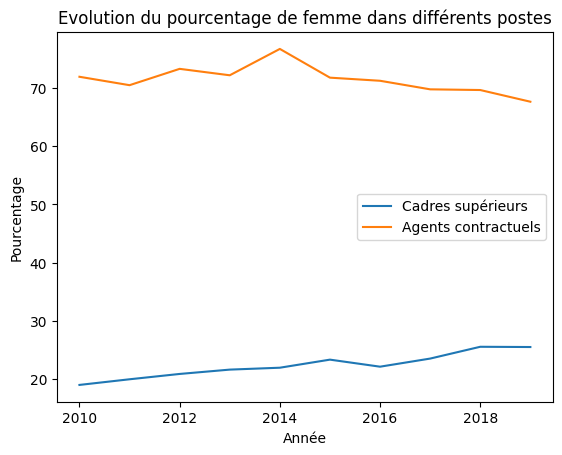

In [16]:
byposteanddate=Tn.groupby(by=["Contrat de travail","Date"])
proportion=byposteanddate["Nombre de femmes"].sum()/(byposteanddate["Nombre de femmes"].sum()+byposteanddate["Nombre d'hommes"].sum())*100
plt.figure()
plt.plot(proportion["Cadres supérieurs"].index,proportion["Cadres supérieurs"], label="Cadres supérieurs")
plt.plot(proportion["Cadres supérieurs"].index,proportion["Agents contractuels temps partiel"], label="Agents contractuels")
plt.legend()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Evolution du pourcentage de femme dans différents postes")

Comme on peut le voir on observe une mince amélioration au cours du temps, les femmes prennent une place de plus en plus importante au sein du poste de cadre supérieure, et une place de moins de moins importante au sein du poste d'agent contractuel.

## III. Fréquentation temporelle par région

On va essayer de voir ici l'évolution au cours du temps de la fréquentation des gares dans chaque département,
afin d'essayer de voir si certaines régions sont plus ou moins délaissées.

### a.Nombre de voyageurs par départements par année

In [17]:
from scipy.stats import linregress

In [2]:
frequence = pd.read_csv('data/frequentation-gares.csv', sep = ';')
frequence

NameError: name 'pd' is not defined

On va d'abord essayer d'afficher l'évolution au cours du temps d'une seule région, admettons le département de Paris.
On veut d'abord isoler le numero de déprtement, on doit donc vectoriser la fonction partie entière, j'ai donc cherché sur internet
la fonction np.floor est vectorisée.

In [14]:
frequence['departement'] = np.floor(frequence['Code postal']/1000)
frequence

,Nom de la gare,Code UIC,Code postal,Segmentation DRG,Total Voyageurs 2023,Total Voyageurs + Non voyageurs 2023,Total Voyageurs 2022,Total Voyageurs + Non voyageurs 2022,Total Voyageurs 2021,Total Voyageurs + Non voyageurs 2021,...,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015,departement
0,Acheux - Franleu,87316745,80560,C,0,0,2,2,0,0,...,2,235,235,104,104,308,308,898,898,80.0
1,Aiguebelette-le-Lac,87741421,73610,C,4394,4394,4046,4046,3658,3658,...,4754,2535,2535,3117,3117,3912,3912,4071,4071,73.0
2,Aigueperse,87734129,63260,C,86794,86794,70599,70599,55143,55143,...,75954,70745,70745,77218,77218,78088,78088,75873,75873,63.0
3,Albi,87615005,81000,B,568827,711034,531922,664902,391271,489089,...,519537,368147,460184,432819,541024,392651,490814,412872,516090,81.0
4,Albi Madeleine,87615195,81000,C,89396,89396,80495,80495,57591,57591,...,51855,44787,44787,55019,55019,52084,52084,63723,63723,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,Wilwisheim,87212175,67270,C,52980,52980,49664,49664,38081,38081,...,39515,39001,39001,33171,33171,32877,32877,34845,34845,67.0
3006,Wisches,87214676,67130,C,89057,89057,98781,98781,85596,85596,...,88851,91479,91479,100373,100373,103452,103452,112884,112884,67.0
3007,Woincourt,87317511,80520,C,639,639,674,674,846,846,...,4995,7732,7732,11946,11946,13623,13623,14320,14320,80.0
3008,Yerres,87682112,91330,B,3978128,3978128,3738278,3738278,3059573,3059573,...,4525768,4349907,4349907,4207385,4207385,3990066,3990066,3764066,3764066,91.0


On regroupe ensuite par départements et on veut, pour chaque année, sommer les fréquentations de chaque département

On garde uniquement les colonnes qui nous intéressent

In [15]:
T = ['Total Voyageurs 2023', 'Total Voyageurs 2022', 'Total Voyageurs 2021', 'Total Voyageurs 2020', 'Total Voyageurs 2019', 
     'Total Voyageurs 2018', 'Total Voyageurs 2017', 'Total Voyageurs 2016', 'Total Voyageurs 2015', 'departement']
isolé = frequence[T].groupby( by = 'departement')
tot = isolé.sum()
tot.columns = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]
tot

,2023,2022,2021,2020,2019,2018,2017,2016,2015
departement,,,,,,,,,
1.0,9815479,9076197,7002990,5618650,8649911,7939025,8628737,8300028,8454277
2.0,8287508,7371600,6043766,4905623,6902960,6806261,7406849,7294130,7531348
3.0,3059253,2932596,2309374,1850282,2869989,2675575,2946817,2815151,2965111
4.0,222139,191022,137035,89231,194418,241562,308344,283524,287036
5.0,904643,809467,577337,468399,823679,791640,957326,958079,999246
...,...,...,...,...,...,...,...,...,...
92.0,149772062,159805208,126776027,59200677,155559866,153588786,152927558,150248055,145104160
93.0,309560179,277014447,222576113,151744988,293659090,294174512,288305462,277191723,271730767
94.0,98707055,92765733,87744621,57681818,110062498,111417091,112807571,112148916,111099812


On a maintenant le tableau des fréquentations depuis 2015. On aimerait maintenant voir l'évolution temporelle afin de 
mettre en valeur les différences entre département d'évolution du système ferroviaire.


### b.Taux d'évolution temporelle de fréquentation par département

Concentrons nous sur 1 departement, par exemple 31

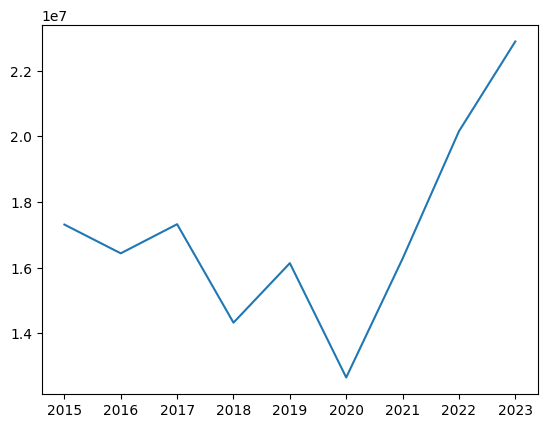

In [16]:
HG = tot.loc[31]
plt.plot(HG)
plt.show();

On voit ici que le covid fausse complétement les stats, on se propose donc d'évaluer le taux de progression post covid

In [17]:
tot = tot.loc[:, [2020, 2021, 2022, 2023]]
tot.loc[31, :]

2020    12658019
2021    16274670
2022    20151566
2023    22885051
Name: 31.0, dtype: int64

Puis, pour chacun des départements, on va estimer le taux d'évolution de la fréquentation de ces gares
Pour chacune des lignes, on va effectuer une régression linéaire et afficher la pente ainsi que le coefficient r
On essaie avec la haute garonne

In [18]:
X = [2020, 2021, 2022, 2023]
T = linregress(X, tot.loc[31, :])
pente, r = T[0], T[2] 
print(pente, r)

3455799.2 0.9975513563183643


On incrémente donc sur chaque ligne et on stocke tout ça dans des listes qu'on intégrera ensuite dans la dataframe Tot

In [19]:
#R = []
#Taux = []
#for i in range (1, 99):
#    T = linregress(X, tot.loc[i, :])
#    R.append(T[2])
#    Taux.append(T[0])
#Taux
    
    

Si on exécute cette cellule, elle renvoie une erreur au niveau de l'indice 20. 
Pour une raison inconnue, le département 20 pose problème, on regarde donc plus précisément.

In [20]:
tot

,2020,2021,2022,2023
departement,,,,
1.0,5618650,7002990,9076197,9815479
2.0,4905623,6043766,7371600,8287508
3.0,1850282,2309374,2932596,3059253
4.0,89231,137035,191022,222139
5.0,468399,577337,809467,904643
...,...,...,...,...
92.0,59200677,126776027,159805208,149772062
93.0,151744988,222576113,277014447,309560179
94.0,57681818,87744621,92765733,98707055


On a en fait 95 lignes donc pas tous les départements 
Il faut donc essayer de parcourir l'index 

In [21]:
R = []
Taux = []
for i in tot.index:
    T = linregress(X, tot.loc[i, :])
    R.append(T[2])
    Taux.append(T[0])


In [22]:
tot['Taux évolution'] = Taux
tot['Fiabilité de la regression'] = R

In [23]:
tot

,2020,2021,2022,2023,Taux évolution,Fiabilité de la regression
departement,,,,,,
1.0,5618650,7002990,9076197,9815479,1466369.4,0.985949
2.0,4905623,6043766,7371600,8287508,1147348.9,0.997695
3.0,1850282,2309374,2932596,3059253,425013.5,0.973698
4.0,89231,137035,191022,222139,45271.1,0.994588
5.0,468399,577337,809467,904643,154086.2,0.985854
...,...,...,...,...,...,...
92.0,59200677,126776027,159805208,149772062,30474333.6,0.868725
93.0,151744988,222576113,277014447,309560179,52788390.7,0.987052
94.0,57681818,87744621,92765733,98707055,12809682.3,0.905961


On trace maintenant le diagramme en fonction des départements pour voir quels départements ont eu un taux d'évolution le plus élevé

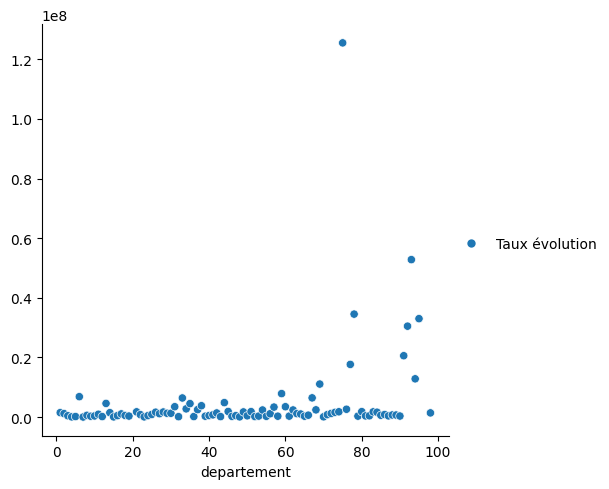

In [24]:
sns.relplot(tot[['Taux évolution']]) ;

On voit ici des départements qui sortent vraiment du lot

In [25]:
U = tot[['Taux évolution']]
U = U.sort_values(by = 'Taux évolution')
U.tail()

,Taux évolution
departement,
92.0,30474333.6
95.0,32992036.3
78.0,34517214.0
93.0,52788390.7
75.0,125492872.8


On voit très clairement que depuis la fin du covid, les régions parisiennes ont eu une évolution en fréquentation bien plus importante
On peut avoir plusieurs interprétations:
-Simplement le fait que la densité de population est bien plus importante à Paris et surtout le nombre de personnes utilisant les transports
-Un gros investissement de la SNCF dans ces zones là
A l'intérieur même de la région parisienne, le 75 se démarque très largement
Regardons les départements où la fréquentation est la plus basse

In [26]:
U.head(10)

,Taux évolution
departement,
7.0,-90.3
15.0,44167.9
4.0,45271.1
23.0,51894.9
48.0,54423.8
70.0,71566.8
32.0,114938.9
43.0,136748.1
12.0,149005.8


L'Ardèche semble avoir eu des problèmes, on le voit même au coefficient de régression linéaire
Globalement, ces département ont eu environ une évolution en fréquentation 400 fois moins importante (très environ) que les plus gros départements
On peut donc encourager la SNCF à diversifier peut-être leur investissement dans les différents départements
Il se peut aussi qu'ils aient déjà mené des études qui montrent que ces départements n'ont pas "besoin" de plus de déplacement.

## IV. Objets Trouvés

Les données de la sncf comprennent une base de donnée sur les objets trouvés dans différentes gares.

In [27]:
obj=pd.read_csv("data/objets-trouves-restitution.csv",delimiter=';')
obj.head()

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets
0,2018-08-16T08:46:55+02:00,2018-08-16T10:52:08+02:00,Nantes,Téléphone portable,"Appareils électroniques, informatiques, appare..."
1,2018-08-16T08:50:34+02:00,NaN,Redon,"Casque (vélo, moto)","Vélos, trottinettes, accessoires 2 roues"
2,2018-08-16T09:11:18+02:00,NaN,Béziers,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables"
3,2018-08-16T09:19:47+02:00,NaN,Rennes,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures"
4,2018-08-16T09:23:18+02:00,NaN,Paris Montparnasse,Sac à dos,"Bagagerie: sacs, valises, cartables"


Ayons un premier apreçu des différentes natures des objets

In [28]:
print(obj["Nature d'objets"].value_counts())

Nature d'objets
Sac à dos                                                                    79845
Porte-monnaie, portefeuille                                                  79394
Valise, sac sur roulettes                                                    65636
Téléphone portable                                                           64086
Manteau, veste, blazer, parka, blouson, cape                                 57134
                                                                             ...  
Luge                                                                            16
Téléphone portable protégé (étui, coque,?)                                       4
Sac d'enseigne (plastique, papier, ?)                                            1
Ordinateur, ordinateur portable, notebook protégé (étui, housse,?)               1
Appareil photo, caméscope/caméras et accessoires protégé (sac, sacoche,?)        1
Name: count, Length: 132, dtype: int64


Il y a 132 natures d'objets trouvés depuis 2014, mais on trouve comme natures 'Téléphone portable' et 'Téléphone portable protégé (étui, coque,?)' ce qui laisse penser qu'il y a certaines natures qui désignent des catégories similaires. 
Parmi les objets les moins trouvés, on trouve des objets étonnants, comme une luge...
Etudions la Série 'Type d'objets' qui sera probablement plus générale.

In [29]:
print(obj["Type d'objets"].value_counts())

Type d'objets
Bagagerie: sacs, valises, cartables                        281581
Appareils électroniques, informatiques, appareils photo    136155
Vêtements, chaussures                                      109111
Porte-monnaie / portefeuille, argent, titres               101244
Pièces d'identités et papiers personnels                    69799
Optique                                                     44296
Clés, porte-clés, badge magnétique                          37632
Divers                                                      19479
Livres, articles de papéterie                               18745
Vélos, trottinettes, accessoires 2 roues                    13779
Articles de sport, loisirs, camping                         10856
Articles d'enfants, de puériculture                          9729
Parapluies                                                   8679
Bijoux, montres                                              8383
Articles médicaux                                            4

### a .Sélection des lignes sur une plage de dates

Avant de manipuler les données plus en profondeur, vérifions le type des données dans la dataframe

In [30]:
obj.dtypes

Date                            object
Date et heure de restitution    object
Gare                            object
Nature d'objets                 object
Type d'objets                   object
dtype: object

Les différentes dates sont de type object. Converstissons-les en données de type datetime.
On remarque sur les premiers visuels de la dataframe que l'espace entre le jour et l'heure a été remplacé par un "T",
et que le fuseau horaire est indiqué. Pour obtenir le format de datetime souhaité, convertissons déjà les données Series de dates 
en chaînes de caractères.

In [31]:
obj[["Date","Date et heure de restitution"]].astype("string")

,Date,Date et heure de restitution
0,2018-08-16T08:46:55+02:00,2018-08-16T10:52:08+02:00
1,2018-08-16T08:50:34+02:00,<NA>
2,2018-08-16T09:11:18+02:00,<NA>
3,2018-08-16T09:19:47+02:00,<NA>
4,2018-08-16T09:23:18+02:00,<NA>
...,...,...
876769,2024-10-21T14:43:33+02:00,<NA>
876770,2024-10-21T14:16:06+02:00,2024-10-21T14:22:54+02:00
876771,2024-10-21T14:39:51+02:00,<NA>
876772,2024-10-21T14:22:45+02:00,<NA>


On remplace maintenant le "T" par un espace.

In [32]:
obj["Date"]=obj["Date"].str.replace("T", " ")
obj["Date et heure de restitution"]=obj["Date et heure de restitution"].str.replace("T"," ")
obj

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets
0,2018-08-16 08:46:55+02:00,2018-08-16 10:52:08+02:00,Nantes,Téléphone portable,"Appareils électroniques, informatiques, appare..."
1,2018-08-16 08:50:34+02:00,NaN,Redon,"Casque (vélo, moto)","Vélos, trottinettes, accessoires 2 roues"
2,2018-08-16 09:11:18+02:00,NaN,Béziers,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables"
3,2018-08-16 09:19:47+02:00,NaN,Rennes,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures"
4,2018-08-16 09:23:18+02:00,NaN,Paris Montparnasse,Sac à dos,"Bagagerie: sacs, valises, cartables"
...,...,...,...,...,...
876769,2024-10-21 14:43:33+02:00,NaN,Bordeaux Saint-Jean,Sac à dos,"Bagagerie: sacs, valises, cartables"
876770,2024-10-21 14:16:06+02:00,2024-10-21 14:22:54+02:00,Mulhouse,Clé de voiture,"Clés, porte-clés, badge magnétique"
876771,2024-10-21 14:39:51+02:00,NaN,Montpellier Saint-Roch,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres"
876772,2024-10-21 14:22:45+02:00,NaN,Paris Gare du Nord,Sac à main,"Bagagerie: sacs, valises, cartables"


On retire le fuseau horaire (+01:00 ou +02:00 en fonction de l'heure d'été ou d'hiver) à l'aide de la fonction str.removesuffix

In [33]:
obj["Date"]=obj["Date"].str.removesuffix("+02:00")
obj["Date"]=obj["Date"].str.removesuffix("+01:00")
obj["Date et heure de restitution"]=obj["Date et heure de restitution"].str.removesuffix("+02:00")
obj["Date et heure de restitution"]=obj["Date et heure de restitution"].str.removesuffix("+01:00")
obj

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets
0,2018-08-16 08:46:55,2018-08-16 10:52:08,Nantes,Téléphone portable,"Appareils électroniques, informatiques, appare..."
1,2018-08-16 08:50:34,NaN,Redon,"Casque (vélo, moto)","Vélos, trottinettes, accessoires 2 roues"
2,2018-08-16 09:11:18,NaN,Béziers,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables"
3,2018-08-16 09:19:47,NaN,Rennes,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures"
4,2018-08-16 09:23:18,NaN,Paris Montparnasse,Sac à dos,"Bagagerie: sacs, valises, cartables"
...,...,...,...,...,...
876769,2024-10-21 14:43:33,NaN,Bordeaux Saint-Jean,Sac à dos,"Bagagerie: sacs, valises, cartables"
876770,2024-10-21 14:16:06,2024-10-21 14:22:54,Mulhouse,Clé de voiture,"Clés, porte-clés, badge magnétique"
876771,2024-10-21 14:39:51,NaN,Montpellier Saint-Roch,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres"
876772,2024-10-21 14:22:45,NaN,Paris Gare du Nord,Sac à main,"Bagagerie: sacs, valises, cartables"


On vérifie que toutes les dates ont la même longueur, il n'y a pas de format inattendu dans les données.

In [34]:
obj["Date"].str.len().value_counts()
obj["Date et heure de restitution"].str.len().value_counts()

Date et heure de restitution
19.0    342720
Name: count, dtype: int64

On peut enfin convertir les dates en datetime

In [35]:
obj["Date"]=pd.to_datetime(obj["Date"])
obj["Date et heure de restitution"]=pd.to_datetime(obj["Date et heure de restitution"])
obj["Date"].dtypes #le type '<M8[ns]' est le même que le type datetime

dtype('<M8[ns]')

On voudrait indexer les données par date, vérifions que chaque date est unique.

In [36]:
obj["Date"].value_counts()

Date
2017-12-14 07:23:24    4
2017-07-04 07:29:58    4
2022-08-06 15:39:05    3
2017-12-27 16:46:51    3
2018-01-18 07:19:09    3
                      ..
2024-10-21 08:09:55    1
2024-10-21 08:14:21    1
2024-10-21 09:32:16    1
2024-10-21 08:39:09    1
2018-08-16 09:32:20    1
Name: count, Length: 874448, dtype: int64

Plusieurs objets ont été trouvés aux mêmes instants, il serait délicat d'indexer avec la date.

Remarquons que les lignes ne sont pas triées par date dans la Dataframe, il faut y remédier. De plus, la Dataframe comporte presque un million de lignes, nous allons réduire l'intervalle de temps à l'année 2023 afin d'éviter d'avoir moins de natures d'objets parasites et de réduire le temps de calcul.

In [37]:
plus_court=obj.loc[(((obj["Date"])< "2024-01-01 00:00:00") & ((obj["Date"])> "2023-01-01 00:00:00"))].copy()
plus_court=plus_court.sort_values("Date")
plus_court

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets
632226,2023-01-01 05:43:32,2023-02-28 10:10:29,Saint-Gervais-les-Bains Le Fayet,Carte Vitale,Pièces d'identités et papiers personnels
135765,2023-01-01 05:47:10,2023-02-28 10:14:50,Saint-Gervais-les-Bains Le Fayet,"Porte-monnaie, portefeuille","Porte-monnaie / portefeuille, argent, titres"
206814,2023-01-01 05:51:24,NaT,Saint-Gervais-les-Bains Le Fayet,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables"
632231,2023-01-01 05:54:17,NaT,Saint-Gervais-les-Bains Le Fayet,Sac à dos,"Bagagerie: sacs, valises, cartables"
206819,2023-01-01 05:57:32,NaT,Saint-Gervais-les-Bains Le Fayet,Sac à dos,"Bagagerie: sacs, valises, cartables"
...,...,...,...,...,...
515490,2023-12-31 22:21:44,2024-02-15 15:38:04,Paris Saint-Lazare,"Carte d'identité, passeport, permis de conduire",Pièces d'identités et papiers personnels
512808,2023-12-31 22:34:02,2024-01-02 17:12:29,Valence,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables"
515495,2023-12-31 22:53:46,NaT,Toulouse Matabiau,"Autres articles enfants, bébé","Articles d'enfants, de puériculture"
515500,2023-12-31 22:55:23,2024-01-03 15:58:50,Tourcoing,"Sacoche ventrale, banane","Bagagerie: sacs, valises, cartables"


### b. Etude des données des objets trouvés pour l'année 2023

Les types d'objets perdus restent globalement les mêmes que pour la totalité de la Dataframe.

In [38]:
plus_court["Type d'objets"].value_counts()

Type d'objets
Bagagerie: sacs, valises, cartables                        32519
Appareils électroniques, informatiques, appareils photo    14865
Vêtements, chaussures                                       8622
Porte-monnaie / portefeuille, argent, titres                8565
Pièces d'identités et papiers personnels                    4280
Optique                                                     2739
Clés, porte-clés, badge magnétique                          2683
Divers                                                      1767
Vélos, trottinettes, accessoires 2 roues                    1667
Articles de sport, loisirs, camping                         1152
Livres, articles de papéterie                               1091
Articles d'enfants, de puériculture                          766
Bijoux, montres                                              728
Parapluies                                                   522
Articles médicaux                                            468
Instruments

On découvre en revanche de nouveaux objets improbables comme deux Après-skis ou un club de golf.

In [39]:
plus_court["Nature d'objets"].value_counts()

Nature d'objets
Sac à dos                                         10026
Valise, sac sur roulettes                          8171
Porte-monnaie, portefeuille                        7014
Sac de voyage, sac de sport, sac à bandoulière     5151
Manteau, veste, blazer, parka, blouson, cape       5001
                                                  ...  
Luge                                                  5
Club de golf                                          4
Calculatrice de poche                                 3
Après-ski                                             2
Snowboard                                             1
Name: count, Length: 122, dtype: int64

Représentons les proportions des différentes catégories d'objets trouvés.

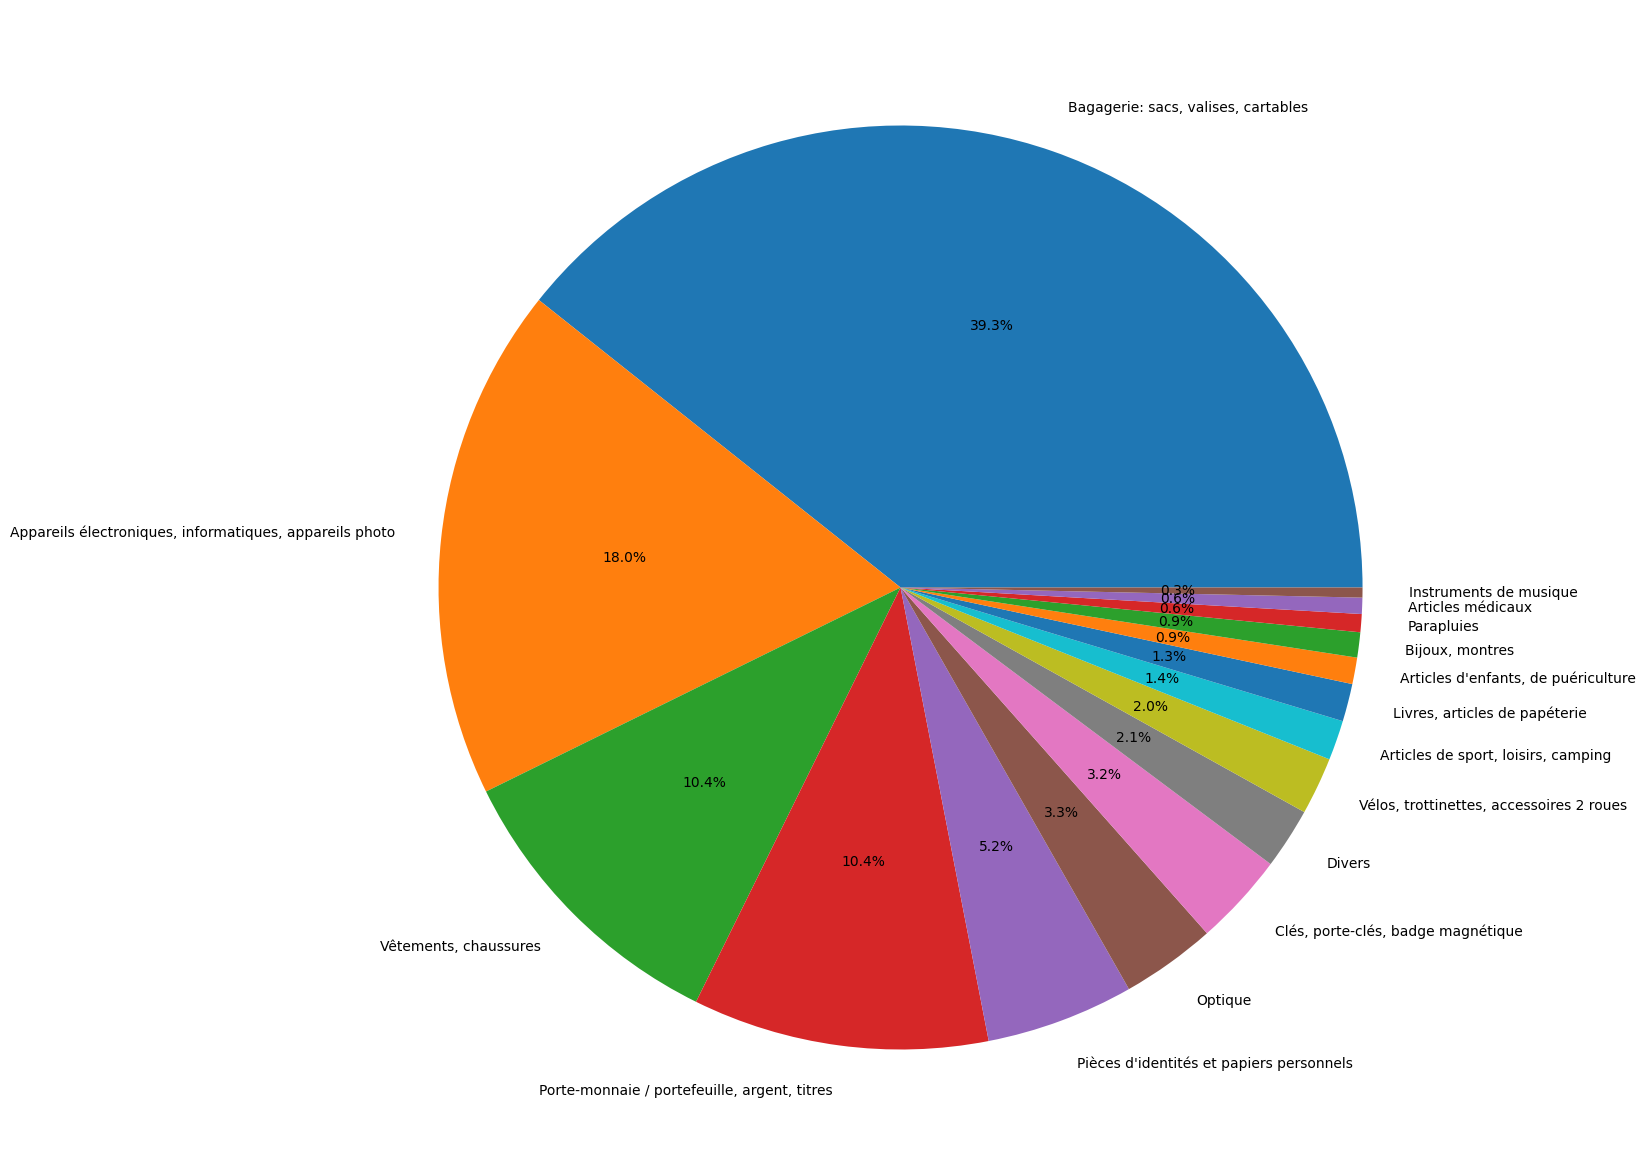

In [40]:
categorie=plus_court["Type d'objets"].value_counts()
plt.figure(figsize = (15,15))
plt.pie(categorie, labels=categorie.index, autopct='%1.1f%%')
plt.show()

Il serait intéressant de savoir quel genre d'objets se cache dans la catégorie 'Articles de sport, loisirs, camping' et lequels sont les plus retrouvés.

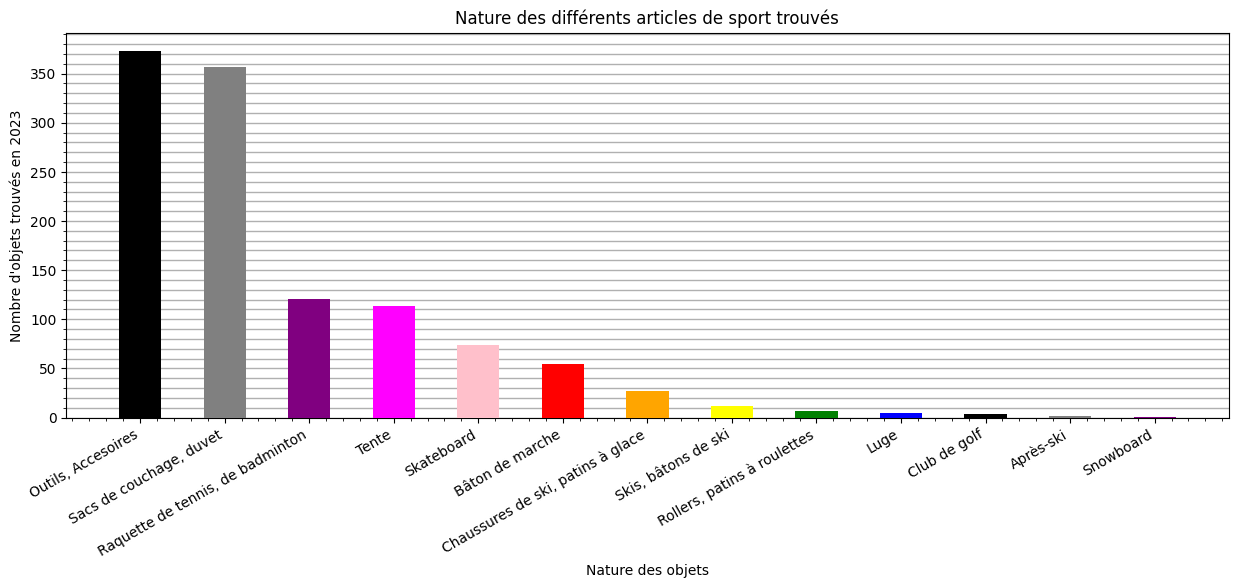

In [41]:
sport=plus_court.loc[(plus_court["Type d'objets"]=="Articles de sport, loisirs, camping"),"Nature d'objets"].value_counts()
couleurs=["black","grey","purple","magenta","pink","red", "orange","yellow","green","blue"]
plt.figure(figsize=(15,5))
plt.bar(sport.index, sport, width=0.5,color=couleurs, zorder=3) #le zorder permet de mettre les barres au premier plan
plt.xticks(rotation=30, ha="right") #permet de mettre les catégories en diagonale
plt.minorticks_on()
plt.grid(which='both',lw=1, axis='y', zorder=0)
plt.xlabel("Nature des objets")
plt.ylabel("Nombre d'objets trouvés en 2023")
plt.title("Nature des différents articles de sport trouvés")
plt.show();

On retrouve nos Après-skis et nos luges, ainsi que divers articles de sports d'hiver, mais ils restent une minorité des articles de sport perdus.

### c .Objets restitués

Le but premier des objets trouvés est d'être restitués à leurs propriétaires. Regardons à quelles catégories appartiennent les objets les plus rendus.

In [42]:
plus_court["perdu"]=1 #On ajoute une colonne pour pouvoir compter le nombre d'objets
type_objets=plus_court.groupby("Type d'objets") #on crée un groupby pour les types d'objets
restitues_par_type=(plus_court.loc[plus_court["Date et heure de restitution"].notna()]).groupby("Type d'objets") #on fait de même uniquement avec les objets rendus
proportion_restitues = 100*(restitues_par_type["perdu"].sum())/(type_objets["perdu"].sum())
proportion_restitues=proportion_restitues.sort_values()
proportion_restitues

Type d'objets
Parapluies                                                  8.045977
Bijoux, montres                                             8.791209
Optique                                                    13.472070
Clés, porte-clés, badge magnétique                         23.332091
Articles d'enfants, de puériculture                        23.890339
Divers                                                     24.052066
Articles de sport, loisirs, camping                        24.131944
Vêtements, chaussures                                      25.864069
Livres, articles de papéterie                              30.614115
Vélos, trottinettes, accessoires 2 roues                   33.713257
Appareils électroniques, informatiques, appareils photo    50.676085
Articles médicaux                                          52.350427
Bagagerie: sacs, valises, cartables                        60.979735
Instruments de musique                                     66.089965
Pièces d'identités e

Calculons la proportion globale des objets rendus (peu importe leur catégorie), et intégrons-la aux données à représenter, on choisit de ne montrer que les extrêmes.

In [43]:
moyenne_restitues = 100*plus_court.loc[(plus_court["Date et heure de restitution"].notna()), "perdu"].sum()/plus_court["perdu"].sum()
extremes=proportion_restitues.loc[(proportion_restitues<15)|(proportion_restitues>60)]
extremes_avec_moyenne = extremes.copy()
extremes_avec_moyenne.loc["Moyenne"]=moyenne_restitues
extremes_avec_moyenne=extremes_avec_moyenne.sort_values()

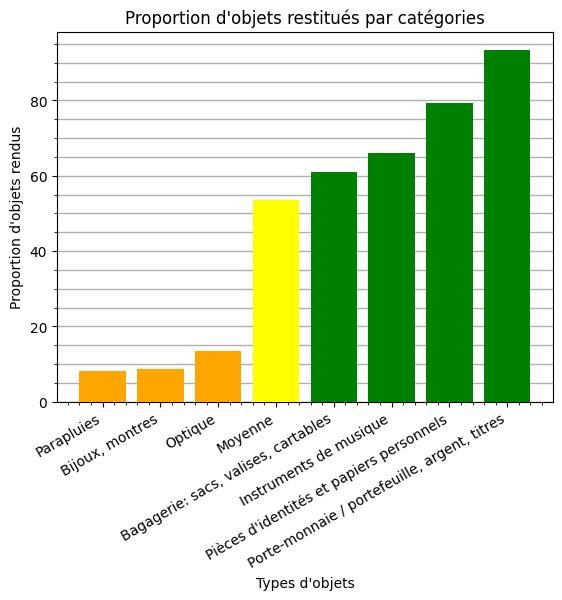

In [44]:
plt.figure()
colors = len(proportion_restitues.loc[(proportion_restitues<15)])*["orange"] + ["yellow"] + len(proportion_restitues.loc[(proportion_restitues>60)])*["green"]
plt.bar(extremes_avec_moyenne.index, extremes_avec_moyenne, color=colors, zorder=3) #le zorder permet de mettre les barres au premier plan
plt.xticks(rotation=30, ha="right") #permet de mettre les catégories en diagonale
plt.minorticks_on()
plt.grid(which='both',lw=1, axis='y', zorder=0)
plt.xlabel("Types d'objets")
plt.ylabel("Proportion d'objets rendus")
plt.title("Proportion d'objets restitués par catégories")
plt.show();

Sans grande surprise, les papiers d'identité et les portefeuilles sont très récupérés, 
de même que les instruments de musique qui sont peu remplaçables. 
Les parapluies, aisément remplaçables, sont très peu récupérés. 
Peu de bijoux sont rendus, peut-être parce que les propriétaires ne savent pas où les chercher.

### d .Temps passé aux objets trouvés

Intéressons-nous au temps que les objets récupérés par leurs propriétaires ont passé aux objets trouvés.

In [45]:
#Temps moyen retour
objets_rendus = plus_court.loc[plus_court["Date et heure de restitution"].notna()].copy()
objets_rendus["Délai"]=objets_rendus["Date et heure de restitution"]-objets_rendus["Date"]
objets_rendus["Délai"].describe()

count                         44310
mean     16 days 05:45:12.576709546
std      36 days 17:29:14.285870315
min                 0 days 00:00:09
25%                 0 days 17:49:17
50%          3 days 16:21:27.500000
75%         16 days 22:46:02.250000
max               653 days 03:54:12
Name: Délai, dtype: object

Le délai maximal de 653 jours semble un peu long, étant donné que la version du tableau "objet-trouves-restitution.csv" date du 20 octobre 2024. Vérifions qu'il ne s'agit pas d'une erreur.

In [46]:
objets_rendus.loc[objets_rendus["Délai"]==objets_rendus["Délai"].max()]

,Date,Date et heure de restitution,Gare,Nature d'objets,Type d'objets,perdu,Délai
206959,2023-01-02 11:37:02,2024-10-16 15:31:14,Nantes,Carte de crédit,"Porte-monnaie / portefeuille, argent, titres",1,653 days 03:54:12


Il ne s'agit donc pas d'une erreur, une carte de crédit a été récupérée presque deux ans après avoir été perdue.

Le temps moyen de retour est d'environ 16 jours, mais la médiane est à 3 jours et 16 heures. 
Essayons de voir une répartition plus parlante.

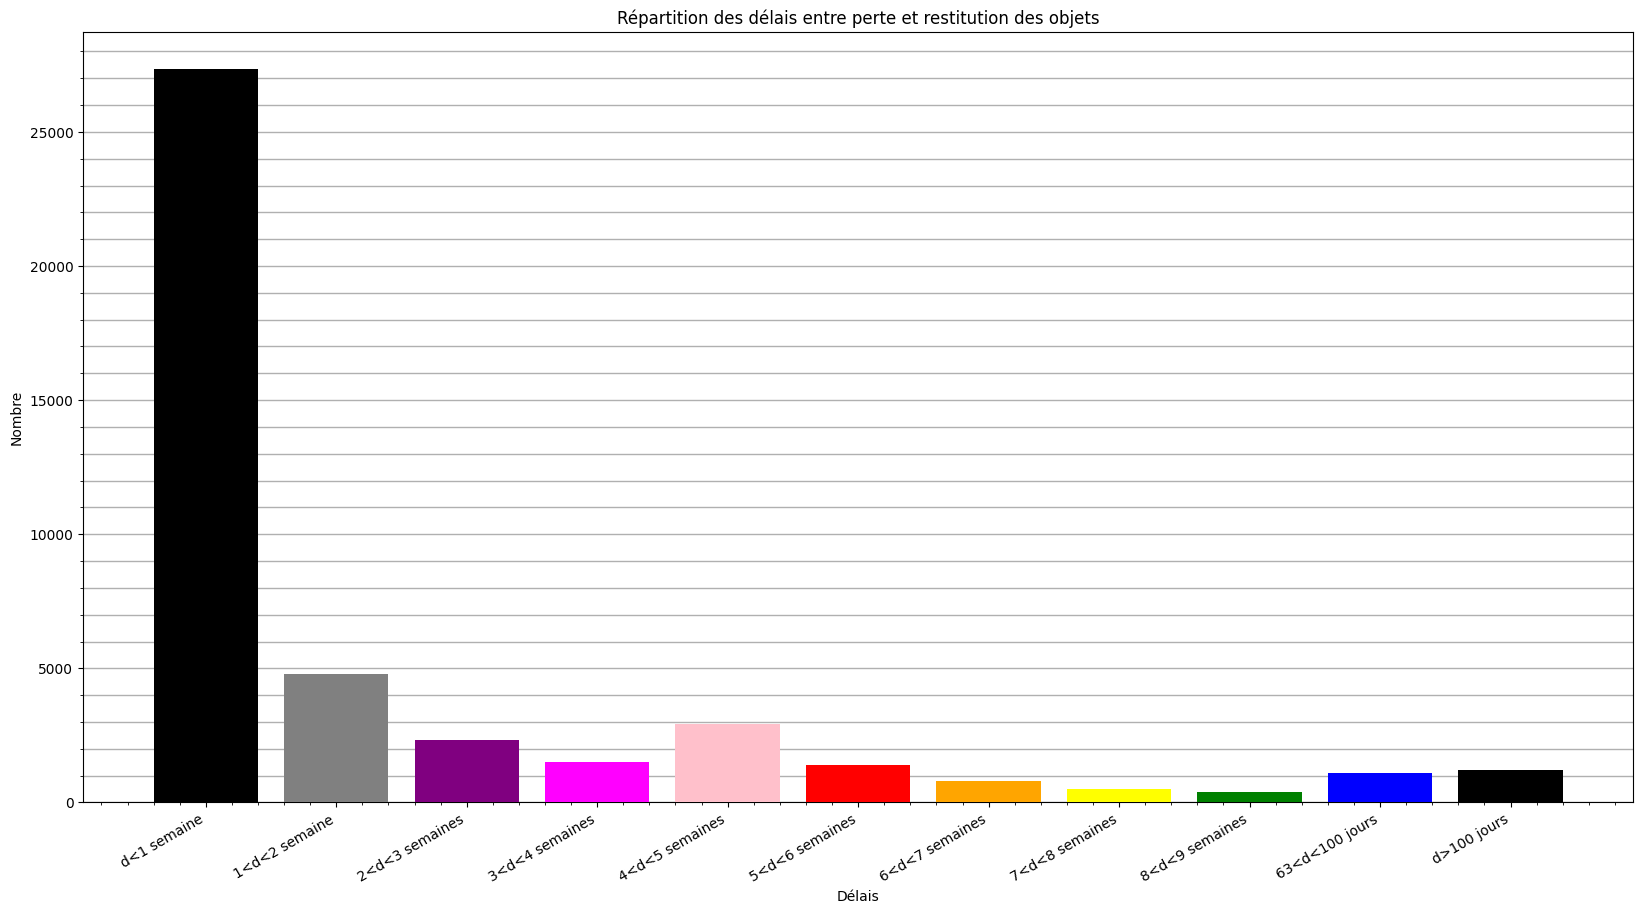

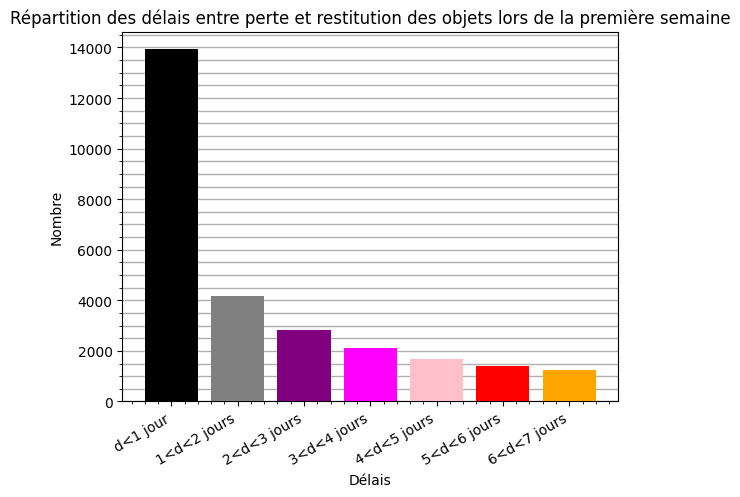

In [47]:
temps_semaine=pd.to_timedelta([0, "7 days", "14 days", "21 days", "28 days","35 days", "42 days","49 days","56 days","63 days", "100 days","654 days"]) 
noms=["d<1 semaine","1<d<2 semaine","2<d<3 semaines","3<d<4 semaines", "4<d<5 semaines","5<d<6 semaines","6<d<7 semaines","7<d<8 semaines", "8<d<9 semaines","63<d<100 jours","d>100 jours"]
repartition_semaine=pd.cut(objets_rendus["Délai"], bins= temps_semaine, labels=noms).value_counts().sort_index()

plt.figure(figsize=(20,10))
plt.bar(repartition_semaine.index, repartition_semaine, color=couleurs, zorder=3) #le zorder permet de mettre les barres au premier plan
plt.xticks(rotation=30, ha="right") #permet de mettre les catégories en diagonale
plt.minorticks_on()
plt.grid(which='both',lw=1, axis='y', zorder=0)
plt.xlabel("Délais")
plt.ylabel("Nombre")
plt.title("Répartition des délais entre perte et restitution des objets")

temps_s1=pd.to_timedelta([0, "1 day", "2 days", "3 days", "4 days", "5 days", "6 days", "7 days"])
noms_s1=["d<1 jour","1<d<2 jours", "2<d<3 jours","3<d<4 jours", "4<d<5 jours", "5<d<6 jours","6<d<7 jours"]
repartition_s1=pd.cut(objets_rendus["Délai"], bins= temps_s1, labels=noms_s1).value_counts().sort_index()
plt.figure()
plt.bar(repartition_s1.index, repartition_s1, color=couleurs, zorder=3) #le zorder permet de mettre les barres au premier plan
plt.xticks(rotation=30, ha="right") #permet de mettre les catégories en diagonale
plt.minorticks_on()
plt.grid(which='both',lw=1, axis='y', zorder=0)
plt.xlabel("Délais")
plt.ylabel("Nombre")
plt.title("Répartition des délais entre perte et restitution des objets lors de la première semaine")

plt.show();

L'essentiel des retours d'objets se fait donc le jour même ou dans la première semaine suivant la perte de l'objet. 
Seuls environ 1200 objets sont récupérés après 100 jours, et on voit que sur un intervalle de temps donné, 
plus le temps passe, moins il y a d'objets récupérés (à l'exception de la 5e semaine après la perte où plus d'objets sont récupérés que la 3e ou la 4e).

### e .Lien entre la fréquentation des gares et le nombre d'objets perdus

Observons les principales gares parisiennes et regardons s'il existe une corrélation entre le nombre d'objets perdus et leur fréquentation.

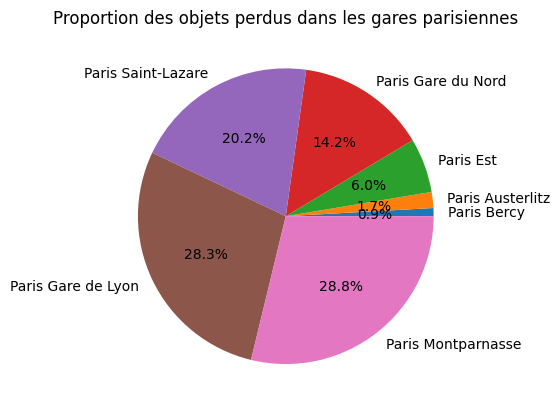

In [48]:
#objets perdus par gare Parisienne
plus_court["Gare"].astype("string")
gare_paris=plus_court.loc[(plus_court["Gare"].str.contains("Paris")).astype("bool"), "Gare"] 
#on sélectionne les gares parisiennes  dans la dataframe à l'aide de la commande str.contains()
obj_par_gare=gare_paris.value_counts().sort_values()

plt.figure()
plt.pie(obj_par_gare, labels=obj_par_gare.index,  autopct='%1.1f%%')
plt.title("Proportion des objets perdus dans les gares parisiennes")
plt.show() ;


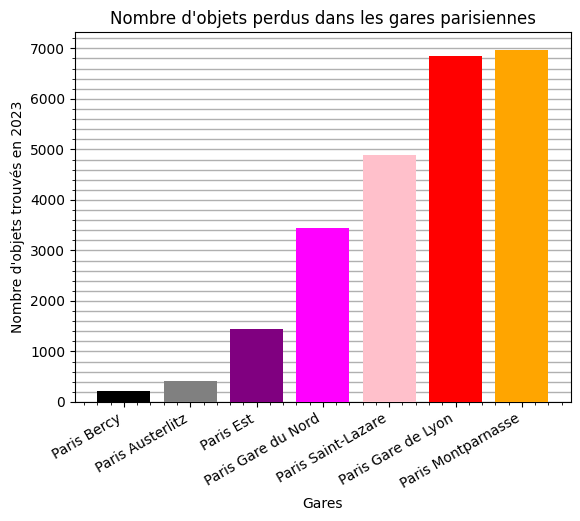

In [49]:
plt.figure()
plt.bar(obj_par_gare.index, obj_par_gare, color=couleurs, zorder=3) #le zorder permet de mettre les barres au premier plan
plt.xticks(rotation=30, ha="right") #permet de mettre les catégories en diagonale
plt.minorticks_on()
plt.grid(which='both',lw=1, axis='y', zorder=0)
plt.xlabel("Gares")
plt.ylabel("Nombre d'objets trouvés en 2023")
plt.title("Nombre d'objets perdus dans les gares parisiennes")

plt.show() ;

La gare de Lyon et la gare Montparnasse sont donc celles où l'on perd le plus d'objets.

La sncf propose aussi des données sur la fréquentation des gares.

In [50]:
freq=pd.read_csv("data/frequentation-gares.csv",delimiter=";")
freq.head(5)

,Nom de la gare,Code UIC,Code postal,Segmentation DRG,Total Voyageurs 2023,Total Voyageurs + Non voyageurs 2023,Total Voyageurs 2022,Total Voyageurs + Non voyageurs 2022,Total Voyageurs 2021,Total Voyageurs + Non voyageurs 2021,...,Total Voyageurs 2019,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015
0,Acheux - Franleu,87316745,80560,C,0,0,2,2,0,0,...,2,2,235,235,104,104,308,308,898,898
1,Aiguebelette-le-Lac,87741421,73610,C,4394,4394,4046,4046,3658,3658,...,4754,4754,2535,2535,3117,3117,3912,3912,4071,4071
2,Aigueperse,87734129,63260,C,86794,86794,70599,70599,55143,55143,...,75954,75954,70745,70745,77218,77218,78088,78088,75873,75873
3,Albi,87615005,81000,B,568827,711034,531922,664902,391271,489089,...,415630,519537,368147,460184,432819,541024,392651,490814,412872,516090
4,Albi Madeleine,87615195,81000,C,89396,89396,80495,80495,57591,57591,...,51855,51855,44787,44787,55019,55019,52084,52084,63723,63723


Conservons uniquement les gares parisiennes.

In [51]:
freq_paris=freq.loc[(freq["Nom de la gare"].astype("string").str.contains("Paris ").astype("bool"))].copy()
freq_paris

,Nom de la gare,Code UIC,Code postal,Segmentation DRG,Total Voyageurs 2023,Total Voyageurs + Non voyageurs 2023,Total Voyageurs 2022,Total Voyageurs + Non voyageurs 2022,Total Voyageurs 2021,Total Voyageurs + Non voyageurs 2021,...,Total Voyageurs 2019,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015
1599,Paris Austerlitz,87547000,75013,A,21657509,22602374,19515861,20309128,22281301,22814864,...,21682820,22423095,21821140,22535671,23212805,24037704,23073881,23872118,23300254,24119239
1600,Paris Est,87113001,75010,A,39877017,50339798,36774394,46423121,27758686,35041906,...,41240098,52060520,39301206,49612908,38455354,48545125,35820125,45218475,34919689,44081786
1601,Paris Gare de Lyon,87686006,75012,A,110498896,140547621,102024783,129335965,84120158,105005290,...,112644337,140121852,111226947,137769853,113962625,141761340,111664289,138682324,111506043,138936295
2798,Paris Bercy Bourgogne - Pays d'Auvergne,87686667,75012,A,5073990,5266187,4764857,4945344,3347427,3474224,...,4318464,4482042,3983108,4133983,4003278,4154918,3702383,3842624,3823448,3968276
2799,Paris Gare du Nord,87271007,75010,A,226768485,256157424,211698470,239949211,126621006,149217869,...,244744368,275203433,244465576,274092403,247963153,278140181,242273091,270887333,238356138,266169117
2800,Paris Montparnasse,87391003,75015,A,64471254,80757023,56862435,71219734,41039816,51402955,...,61374056,76622775,59174533,73296351,57752742,72096492,55162747,68903364,55167664,68930603
2801,Paris Saint-Lazare,87384008,75008,A,103453620,137938160,102910589,137214119,91502192,122002923,...,107340421,143120561,108075780,144101040,109956754,146609005,108771941,145029255,107165727,142887636


Ne gardons que les données concernant l'année 2023. 
On remarque aussi que la gare de Paris Bercy n'a pas le même nom que dans l'autre Dataframe, corrigeons cela.

In [52]:
freq_paris_2023=freq_paris[["Nom de la gare","Total Voyageurs 2023"]].copy()
freq_paris_2023.loc[(freq_paris_2023["Nom de la gare"]=="Paris Bercy Bourgogne - Pays d'Auvergne"),"Nom de la gare"]="Paris Bercy"
freq_paris_2023=freq_paris_2023.set_index("Nom de la gare")
freq_paris_2023=freq_paris_2023.sort_values("Total Voyageurs 2023")
freq_paris_2023

,Total Voyageurs 2023
Nom de la gare,
Paris Bercy,5073990
Paris Austerlitz,21657509
Paris Est,39877017
Paris Montparnasse,64471254
Paris Saint-Lazare,103453620
Paris Gare de Lyon,110498896
Paris Gare du Nord,226768485


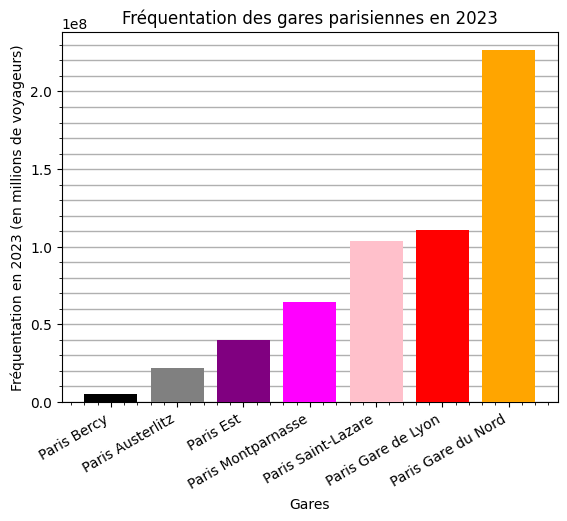

In [53]:
plt.figure()
plt.bar(freq_paris_2023.index, freq_paris_2023["Total Voyageurs 2023"], color=couleurs, zorder=3) #le zorder permet de mettre les barres au premier plan
plt.xticks(rotation=30, ha="right") #permet de mettre les catégories en diagonale
plt.minorticks_on()
plt.grid(which='both',lw=1, axis='y', zorder=0)
plt.xlabel("Gares")
plt.ylabel("Fréquentation en 2023 (en millions de voyageurs)")
plt.title("Fréquentation des gares parisiennes en 2023")
plt.show();

Ici, Gare du Nord est bien plus fréquentée que les autres gares.
Joignons les deux dataframes pour tracer le nombre d'objets trouvés en fonction de la fréquentation.

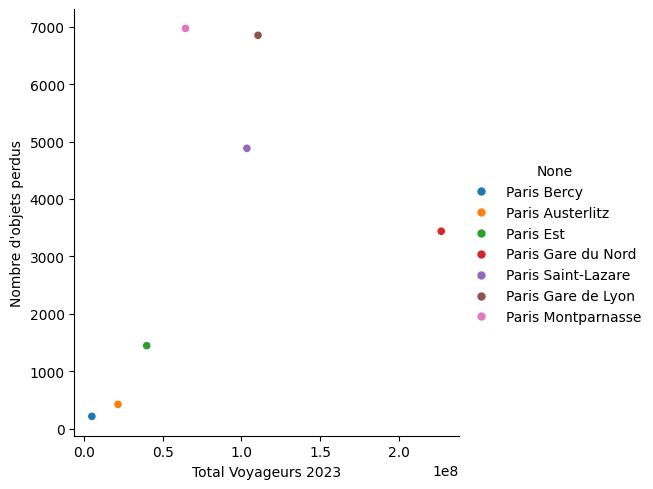

In [54]:
freq_objets = pd.concat([obj_par_gare,freq_paris_2023], axis=1)
freq_objets["Nombre d'objets perdus"]=freq_objets["count"]
sns.relplot(data=freq_objets, x=freq_objets["Total Voyageurs 2023"], y=freq_objets["Nombre d'objets perdus"], marker="o", hue=freq_objets.index);

On voit qu'il n'y a pas de corrélation évidente entre ces deux facteurs, même s'il y a moins d'objets trouvés dans les gares peu fréquentées que dans les gares très fréquentées. 
Paris Gare du Nord, la gare la plus fréquentée, a deux fois moins d'objets trouvés que Montparnasse (qui est plus de deux fois moins fréquentée). 
Cela peut peut-être s'expliquer par le fait que les voyageurs de Gare du Nord sont plutôt des usagers des lignes régulières 
et ont moins d'affaires avec eux lors de leurs déplacements par rapport à Gare de Lyon ou Montparnasse, 
ou peut-être que les objets perdus sont moins souvent rapportés aux objets trouvés car ils sont volés ou que les usagers réguliers y font moins attention.